# Name: E.NITHYASHRI


## Data Science & Business Analytics


### PREDICTION USING SUPERVISED MACHINE LEARNING


Dataset used: http://bit.ly/w-data

## TASK 1:

#### Based upon the number of hours of study, students' score (in %) is predicted. As only 2 variables are used (hours, score), simple linear regression is used with Python.

In [1]:
# Importing all the required libraries to this notebook:

import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [2]:
# Reading data from remote link:

dataset = "http://bit.ly/w-data"
study_data = pd.read_csv(dataset)
print("Dataset imported successfully.")

Dataset imported successfully.


In [3]:
#Checking the dimension of the imported dataset:

study_data.shape

(25, 2)

In [4]:
#Studying about the information of the data in the imported dataset:

study_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
#Checking for the null values(if any) in the imported dataset:

study_data.isnull()

,Hours,Scores
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
5,False,False
6,False,False
7,False,False
8,False,False
9,False,False


As all the values shows False, there are no null values in the imported dataset.

In [6]:
#Imported dataset:

study_data.head(25) #25 represents 25 numbers of data in the dataset.

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [7]:
#Description of the imported dataset:

study_data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


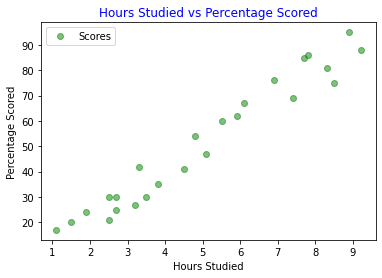

In [8]:
# Plotting the distribution of scores on a 2-D graph to visualise the imported data:

study_data.plot(x='Hours', y='Scores', style='o',color='green', alpha=0.5)  
plt.title('Hours Studied vs Percentage Scored', color='blue')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.show()

In [9]:
#dividing the data into "attributes" (inputs) and "labels" (outputs):

X = study_data.iloc[:, :-1].values  
y = study_data.iloc[:, 1].values  

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=0) 

In [11]:
#Splitting the data into training and test sets:

from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 
print("Training of the model is complete.")

Training of the model is complete.


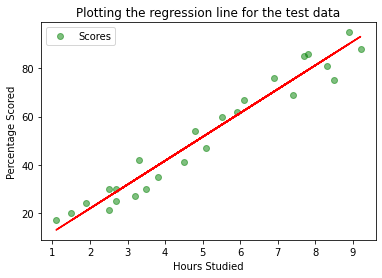

In [12]:
# Plotting the regression line:

line = regressor.coef_*X+regressor.intercept_

# Plotting for the test data:

study_data.plot(x='Hours', y='Scores', style='o',color='green', alpha=0.5)
plt.plot(X, line, color = 'red')
plt.title('Plotting the regression line for the test data')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scored') 
plt.show()

In [13]:
print("Hours(Test data):") # Testing data - In Hours
print(X_test)
y_pred = regressor.predict(X_test) # Predicting the scores
print("Predicted scores(Test data):")
for item in y_pred:
    print(item)

Hours(Test data):
[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]
Predicted scores(Test data):
16.884144762398037
33.73226077948984
75.35701799818723
26.794801243040276
60.491033277223885


In [14]:
# Comparing the Actual and Predicted values(in table):

compare= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [15]:
# Checking the goodness of the fit test:

from sklearn import metrics
print('Accuracy of the Actual and Predicted R-squared is:', metrics.r2_score(y_test, y_pred))

Accuracy of the Actual and Predicted R-squared is: 0.9454906892105356


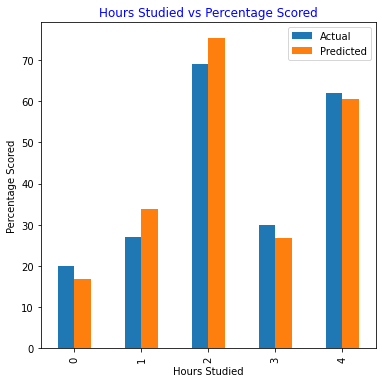

In [16]:
#Comparing the Actual and Predicted values(in graph):

compare.plot(kind="bar", figsize=(6,6))
plt.title('Hours Studied vs Percentage Scored',color='blue')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Scored') 
plt.show()

In [17]:
#Evaluating the model:

from sklearn.metrics import mean_squared_error,mean_absolute_error
mae = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print("Mean Absolute Error= ",mae)
print("Mean Squared Error= ",mse)
print("Root Mean Squared Error = ",rmse)

Mean Absolute Error=  4.6474476121003665
Mean Squared Error=  21.5987693072174
Root Mean Squared Error =  4.6474476121003665


In [18]:
#Testing with my own data: 

hours = 9.25
result = regressor.predict([[hours]])
print("A student might score {} marks if he/she studies for {} hours a day".format(round(result[0],2),hours))

A student might score 93.69 marks if he/she studies for 9.25 hours a day
